# RQ2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dateparse (time_in_secs):
    return pd.to_datetime(time_in_secs,unit='s')

In [3]:
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows=2000000, parse_dates=['timestamp_created', 'timestamp_updated', 'author.last_played'], date_parser=dateparse)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 23 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Unnamed: 0                      int64         
 1   app_id                          int64         
 2   app_name                        object        
 3   review_id                       int64         
 4   language                        object        
 5   review                          object        
 6   timestamp_created               datetime64[ns]
 7   timestamp_updated               datetime64[ns]
 8   recommended                     bool          
 9   votes_helpful                   int64         
 10  votes_funny                     int64         
 11  weighted_vote_score             float64       
 12  comment_count                   int64         
 13  steam_purchase                  bool          
 14  received_for_free               bool          
 15

#### 1 - Plot the number of reviews for each application in descending order.

I group the number of reviews by app name to see how many reviews each app received.

In [5]:
dataset.groupby('app_name').review_id.count().sort_values(ascending=False)

app_name
Garry's Mod                   655524
The Witcher 3: Wild Hunt      469395
Dead by Daylight              265446
Portal 2                      232329
Sid Meier's Civilization V    171404
Counter-Strike: Source        118081
Half-Life                      57320
Half-Life 2: Episode Two       23500
X Rebirth                       7001
Name: review_id, dtype: int64

<AxesSubplot:title={'center':'Reviews by app_name'}, xlabel='app_name', ylabel='Number of reviews'>

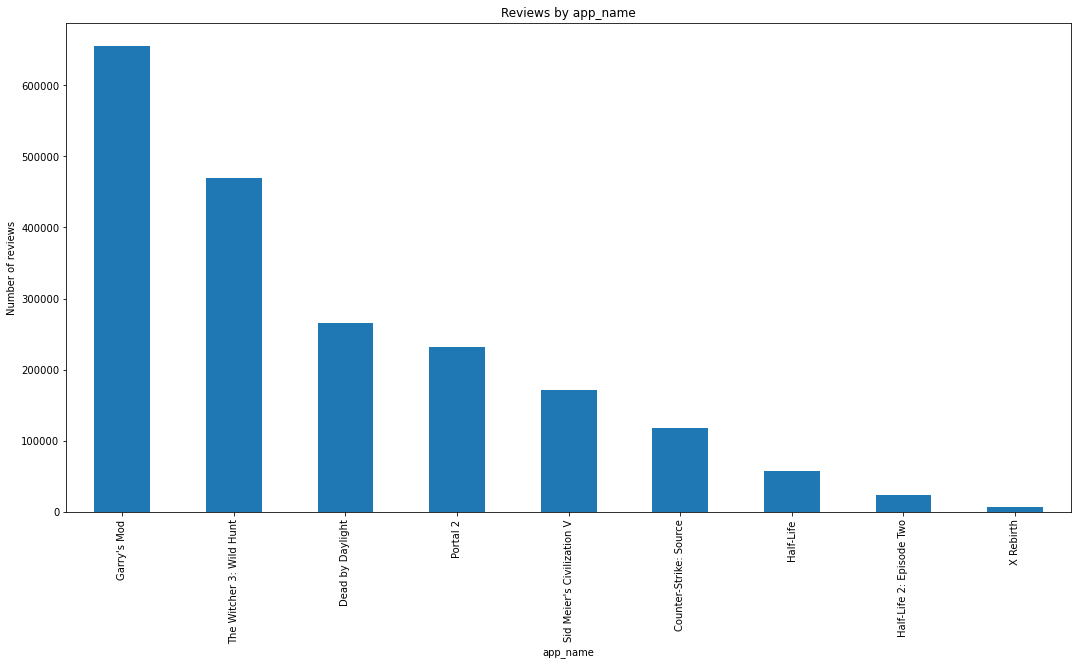

In [6]:
dataset.groupby('app_name').review_id.count().sort_values(ascending=False).plot.bar(figsize=(18,9), xlabel='app_name', ylabel='Number of reviews', title='Reviews by app_name')

#### 2 - What applications have the best Weighted Vote Score?

I check the weighted vote score of the various apps, I sort them in descending order and see which apps have the best weighted vote scores.

In [7]:
dataset[['app_name', 'weighted_vote_score']].groupby(['app_name']).max().sort_values(['weighted_vote_score'],ascending=False)

,weighted_vote_score
app_name,
The Witcher 3: Wild Hunt,0.990385
Sid Meier's Civilization V,0.981034
Garry's Mod,0.978624
Half-Life 2: Episode Two,0.977236
Portal 2,0.971490
Dead by Daylight,0.971278
Counter-Strike: Source,0.969331
Half-Life,0.955650
X Rebirth,0.934387


#### 3 - Which applications have the most and the least recommendations?

Being "recommended" a boolean variable, I sum the various values for each app, I sort them in descending order and in this way I see which apps are more recommended and which are less recommended.

Most recommended apps:

In [13]:
dataset.groupby(["app_name"])["recommended"].sum().sort_values(ascending=False).head()

app_name
Garry's Mod                   632558
The Witcher 3: Wild Hunt      460252
Portal 2                      229470
Dead by Daylight              227356
Sid Meier's Civilization V    164797
Name: recommended, dtype: int64

Less recommended apps:

In [14]:
dataset.groupby(["app_name"])["recommended"].sum().sort_values(ascending=False).tail()

app_name
Sid Meier's Civilization V    164797
Counter-Strike: Source        113430
Half-Life                      55312
Half-Life 2: Episode Two       22704
X Rebirth                       2970
Name: recommended, dtype: int64

#### 4 - How many of these applications were purchased, and how many were given for free?

I consider the apps found in the previous point, the most recommended and the least recommended, and I see how many people have purchased a particular app on steam or received it for free.
As in the previous point, being "steam_purchase" and "received_for_free" boolean variables, I added the various values that the variables assume for each application to see how many people purchased the app and how many received it for free.

In [10]:
dataset[['app_name', 'recommended', 'received_for_free', 'steam_purchase']].groupby(['app_name']).sum().sort_values(['recommended'], ascending=False)

,recommended,received_for_free,steam_purchase
app_name,,,
Garry's Mod,632558,24765,551250
The Witcher 3: Wild Hunt,460252,5748,429409
Portal 2,229470,5779,182952
Dead by Daylight,227356,11413,194118
Sid Meier's Civilization V,164797,1660,105467
Counter-Strike: Source,113430,5082,74817
Half-Life,55312,2799,43875
Half-Life 2: Episode Two,22704,897,17538
X Rebirth,2970,35,4934
